In [18]:
# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

plt.style.use('ggplot')





In [5]:
import pandas as pd

# Load the unzipped CSV file
df = pd.read_csv('../data/metadata.csv')

# Preview the first 5 rows
df.head()


C:\Users\PC\AppData\Local\Temp\ipykernel_14904\1186856673.py:4: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/metadata.csv')


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [6]:
# Check shape (rows, columns)
print("Shape:", df.shape)

# Info about columns and data types
print(df.info())

# Check missing values per column
df.isnull().sum()


Shape: (1056660, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non

cord_uid                  0
sha                  682894
source_x                  0
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
license                   0
abstract             235544
publish_time           1814
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
dtype: int64

In [7]:
# Summary statistics for numeric columns
df.describe()


,mag_id,s2_id
count,0.0,9.764680e+05
mean,NaN,2.175871e+08
std,NaN,5.312281e+07
min,NaN,9.600000e+01
25%,NaN,2.211411e+08
50%,NaN,2.320829e+08
75%,NaN,2.373948e+08
max,NaN,2.491936e+08


In [8]:
# Drop rows missing publish_time or title (critical for analysis)
df_clean = df.dropna(subset=['publish_time', 'title']).copy()

# Fill missing journal names with 'Unknown'
df_clean['journal'] = df_clean['journal'].fillna('Unknown')

# Confirm cleaning results
print("Shape after cleaning:", df_clean.shape)
print("Remaining missing values:")
print(df_clean.isnull().sum())


Shape after cleaning: (1054343, 19)
Remaining missing values:
cord_uid                  0
sha                  680581
source_x                  0
title                     0
doi                  399163
pmcid                664781
pubmed_id            555911
license                   0
abstract             235061
publish_time              0
authors               23784
journal                   0
mag_id              1054343
who_covidence_id     573224
arxiv_id            1040094
pdf_json_files       680581
pmc_json_files       738602
url                  369010
s2_id                 80189
dtype: int64


In [9]:
# Convert publish_time to datetime
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')

# Extract year for time-based analysis
df_clean['year'] = df_clean['publish_time'].dt.year

# Create a column for abstract word count (if abstracts exist)
df_clean['abstract_word_count'] = df_clean['abstract'].fillna('').apply(lambda x: len(x.split()))

# Show first few rows after preparation
df_clean.head()


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,year,abstract_word_count
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,...,BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,2001.0,262
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,...,Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2000.0,142
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,...,Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2000.0,219
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,...,Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2001.0,68
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,...,Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2001.0,110


In [12]:
# Count number of papers per year
year_counts = df_clean['year'].value_counts().sort_index()
year_counts


year
1856.0         3
1857.0         1
1860.0         2
1864.0         1
1876.0         1
           ...  
2020.0    164537
2021.0    219335
2022.0     85265
2023.0         1
2024.0         1
Name: count, Length: 75, dtype: int64

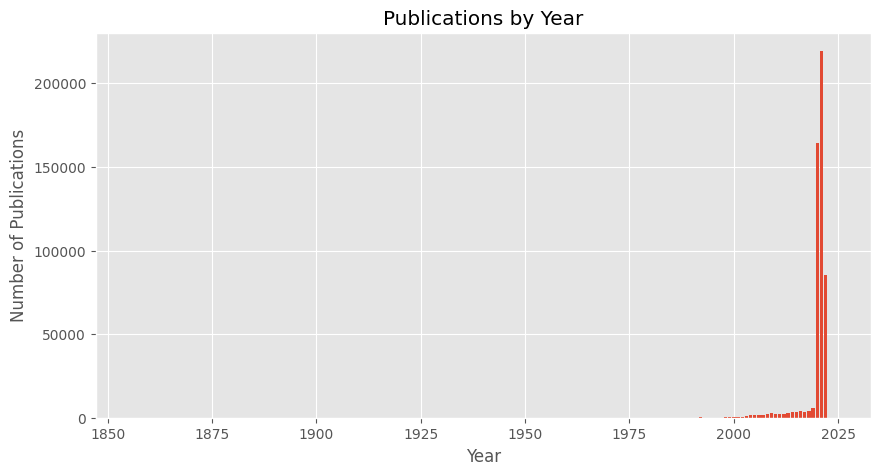

In [13]:
# Plot publications by year
plt.figure(figsize=(10, 5))
plt.bar(year_counts.index, year_counts.values)
plt.title('Publications by Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')


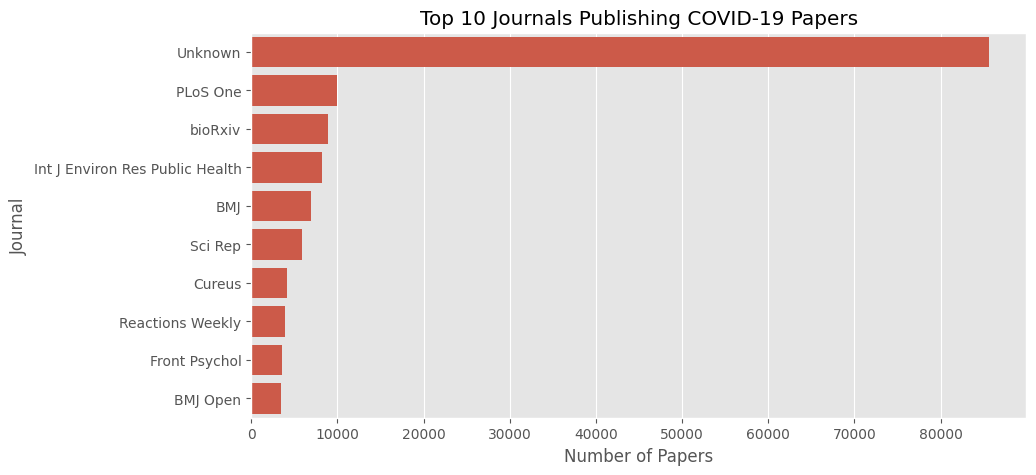

In [16]:
# Top 10 Journals
top_journals = df_clean['journal'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_journals.values, y=top_journals.index)
plt.title('Top 10 Journals Publishing COVID-19 Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Journal')
plt.show()


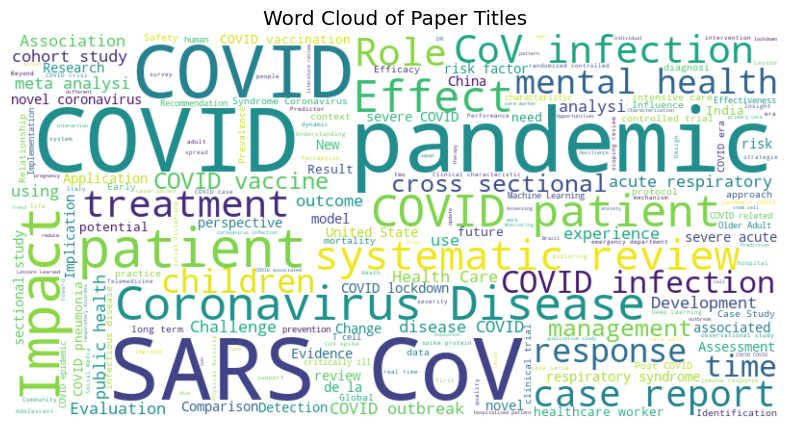

In [19]:
# Generate a word cloud from paper titles
text = " ".join(title for title in df_clean['title'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Paper Titles')
plt.show()


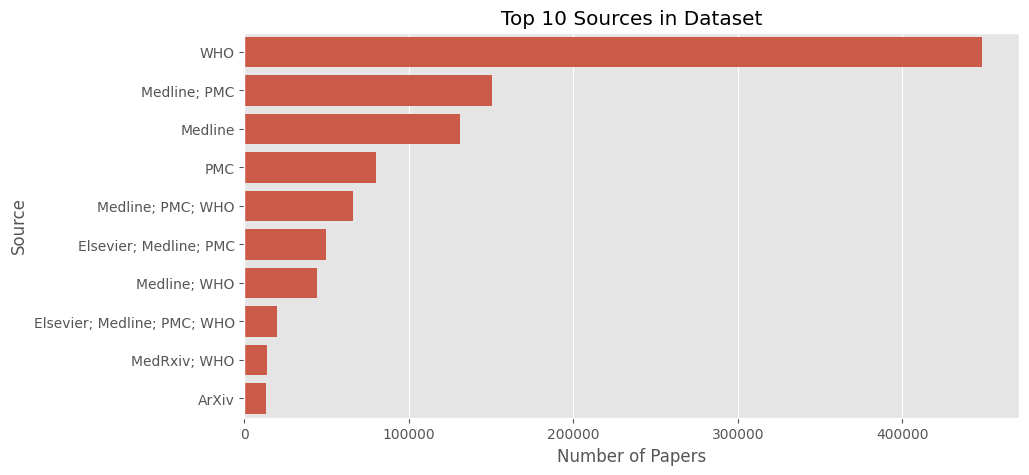

In [20]:
# Plot top 10 sources
top_sources = df_clean['source_x'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_sources.values, y=top_sources.index)
plt.title('Top 10 Sources in Dataset')
plt.xlabel('Number of Papers')
plt.ylabel('Source')
plt.show()


In [21]:
# Save the cleaned dataset
df_clean.to_csv('../data/metadata_cleaned.csv', index=False)
print("Cleaned data saved to ../data/metadata_cleaned.csv")


Cleaned data saved to ../data/metadata_cleaned.csv
